# APPROACH - 4, USING CNN WITH MAXPOOLING WITH K-FOLD CROSS VALIDATION WITH ONE-HOT ENCODING AND SMOTE OVER TRAINING DATA

## Attribute Information

* `id`: unique identifier

* `gender`: "Male", "Female" or "Other"

* `age`: age of the patient

* `hypertension`: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

* `heart_disease`: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

* `ever_married`: "No" or "Yes"

* `work_type`: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

* `Residence_type`: "Rural" or "Urban"

* `avg_glucose_level`: average glucose level in blood

* `bmi`: body mass index

* `smoking_status`: "formerly smoked", "never smoked", "smokes" or "Unknown"

* `stroke`: 1 if the patient had a stroke or 0 if not



<div style = 'border: 3px solid #D9C10B;'>

## Importing the required libraries

In [1]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.initializers import glorot_uniform

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import compute_class_weight
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

## Reading the dataset: 
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset . 


In [2]:
data_path = 'healthcare-dataset-stroke-data.csv'
original_df = pd.read_csv(data_path)
original_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
original_df.drop('id', axis=1, inplace=True)
original_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [5]:
round (original_df.describe(exclude = 'object'), 2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,43.23,0.1,0.05,106.15,28.89,0.05
std,22.61,0.3,0.23,45.28,7.85,0.22
min,0.08,0.0,0.00,55.12,10.30,0.00
25%,25.00,0.0,0.00,77.24,23.50,0.00
50%,45.00,0.0,0.00,91.88,28.10,0.00
75%,61.00,0.0,0.00,114.09,33.10,0.00
max,82.00,1.0,1.00,271.74,97.60,1.00


In [6]:
round (original_df.describe(exclude = ['float', 'int64']))

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


# Removing entries in row of bmi = null  

In [7]:
original_df.dropna(inplace=True)

In [8]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


# Visualization of dataset

In [9]:
def plot_hist(df, row, col, figsize=(10, 20)):
    fig, axs = plt.subplots(nrows=row, ncols=col, figsize=figsize)

    for i, column in enumerate(df.columns):
        row_num = i // col
        col_num = i % col
        ax = axs[row_num, col_num]
        ax.hist(df[column], bins=len(df[column].unique()))
        ax.set_title(column)

    plt.tight_layout()
    plt.show()

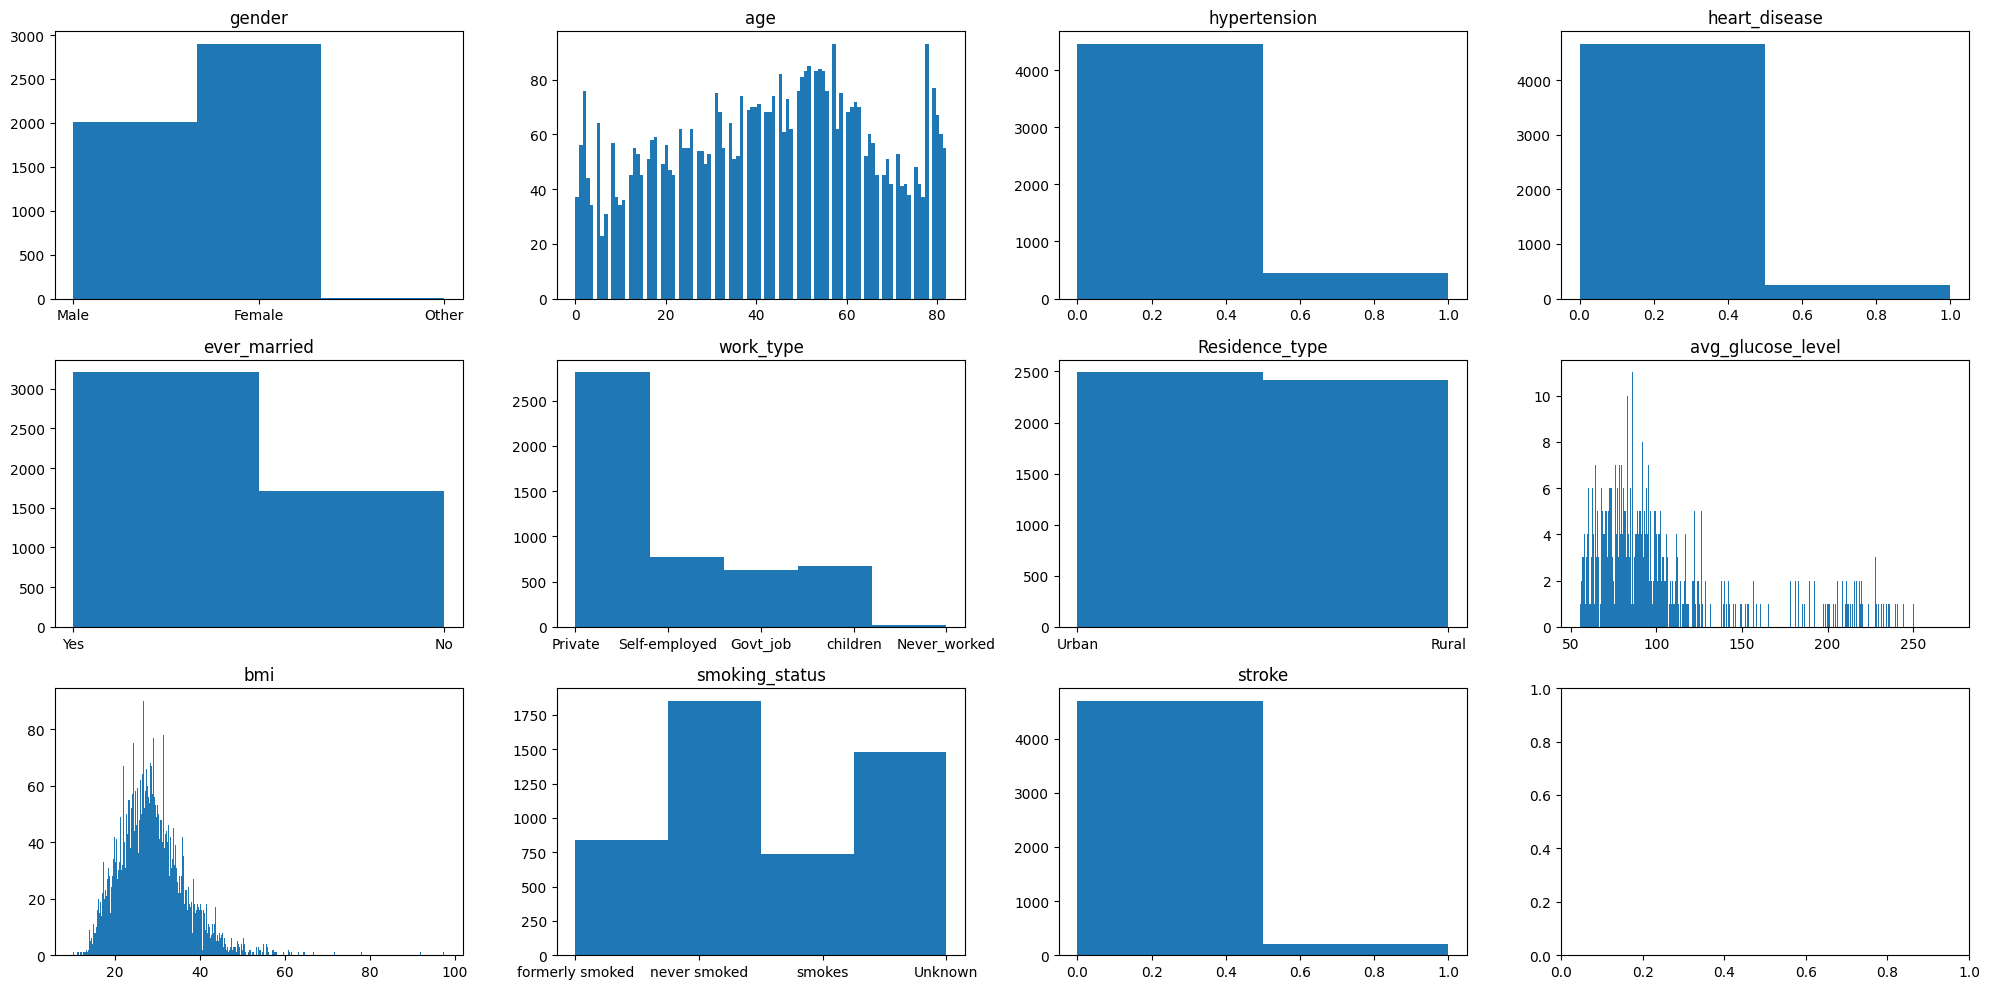

In [11]:
plot_hist(original_df, 3, 4, figsize=(20, 10))

# Checking the unique values in each of the categorical columns

In [10]:
original_df['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [11]:
Other_index = original_df[original_df['gender'].str.contains('Other')].index
original_df.drop(Other_index, inplace=True)
original_df['gender'].value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

In [12]:
original_df['ever_married'].value_counts()

Yes    3204
No     1704
Name: ever_married, dtype: int64

In [13]:
original_df['work_type'].value_counts()

Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [14]:
original_df['Residence_type'].value_counts()

Urban    2490
Rural    2418
Name: Residence_type, dtype: int64

In [15]:
original_df['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [16]:
original_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,42.868810,0.091891,0.049511,105.297402,28.89456,0.042584
std,22.556128,0.288901,0.216954,44.425550,7.85432,0.201937
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [17]:
original_df = original_df.sort_index().reset_index(drop=True)
original_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4903,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4904,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4905,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4906,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Visualization of original dataset & Categorizing the various variables based on WHO guidelines and research paper

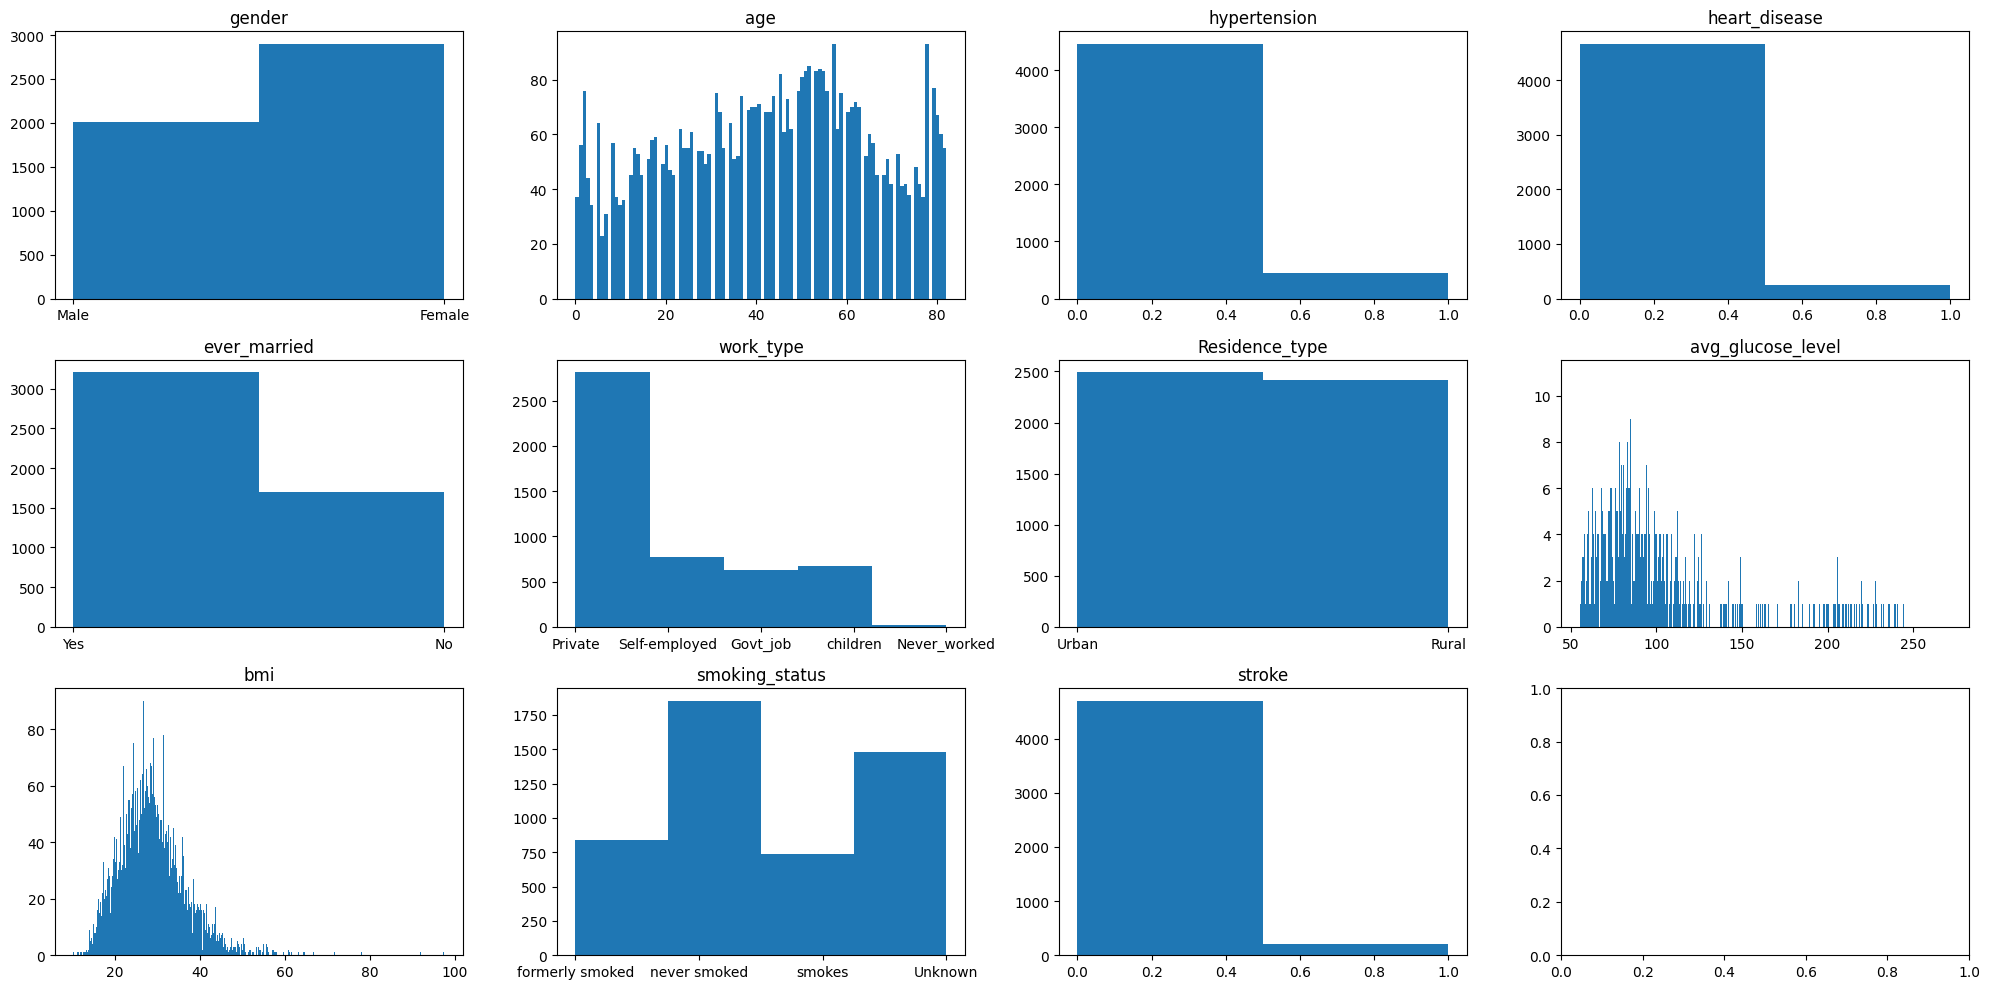

In [19]:
plot_hist(original_df, 3, 4, figsize = (20,10))

<div style = 'border: 3px solid #D9C10B;'>

Defining 4 classes: Underweight, Normal, Overweight, Obese

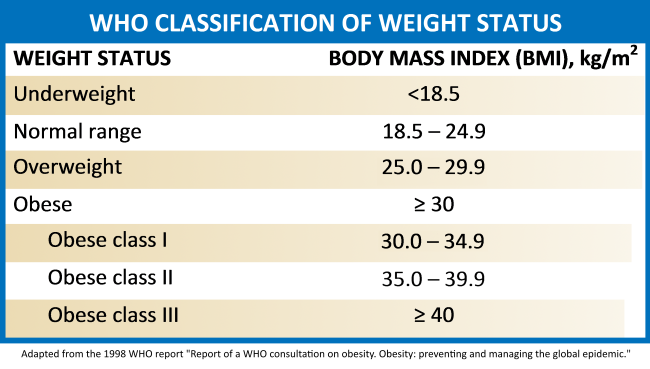

<div style = 'border: 1px solid #D9C10B;'>

CLASSIFICATION FOR AGE

Defining 3 classes:

Patients can be grouped into three age groups:
    
    below 50 years (153, 13.2%);
    
    50-75 years, (702, 60.5%) and
    
    above 75 years (306, 26.4%).

SOURCE : 

According to paper :

Wu CY, Wu HM, Lee JD, Weng HH. Stroke risk factors and subtypes in different age groups: a hospital-based study. Neurol India. 2010 Nov-Dec;58(6):863-8. doi: 10.4103/0028-3886.73747. PMID: 21150050.

<div style = 'border: 1px solid #D9C10B;'>

CLASSIFICATION FOR AVG. GLUCOSE LEVEL

Defining 4 classes:

The expected values for normal fasting blood glucose concentration are between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L). 

When fasting blood glucose is between 100 to 125 mg/dL (5.6 to 6.9 mmol/L) changes in lifestyle and monitoring glycemia are recommended. 

If fasting blood glucose is 126 mg/dL (7 mmol/L) or higher on two separate tests, diabetes is diagnosed.

An individual with low fasting blood glucose concentration (hypoglycemia) – below 70 mg/dL (3.9 mmol/L) – will experience dizziness, sweating, palpitations, blurred vision and other symptoms that have to be monitored.


SOURCE : https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2380#:~:text=The%20expected%20values%20for%20normal,and%20monitoring%20glycemia%20are%20recommended.

<div style = 'border: 3px solid #D9C10B;'>

In [20]:
original_df['gender'] = original_df['gender'].replace({'Female': 0, 'Male': 1})
original_df['Residence_type'] = original_df['Residence_type'].replace({'Rural': 0, 'Urban': 1})
original_df['ever_married'] = original_df['ever_married'].replace({'No': 0, 'Yes': 1})

# define the intervals
bins_bmi = [0, 18.5, 24.9, 29.9, 100]

# create a new column with the interval labels
original_df['bmi'] = pd.cut(original_df['bmi'], bins=bins_bmi, labels=[1, 2, 3, 4]).astype('int64')

# define the intervals
bins_age = [0, 50, 75, 100]

# create a new column with the interval labels
original_df['age'] = pd.cut(original_df['age'], bins=bins_age, labels=[1, 2, 3]).astype('int64')

# define the intervals
bins_avg_glse_lvl = [0, 70, 100, 125, 300]

# create a new column with the interval labels
original_df['avg_glucose_level'] = pd.cut(original_df['avg_glucose_level'], bins=bins_avg_glse_lvl, labels=[1, 2, 3, 4]).astype('int64')


original_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,2,0,1,1,Private,1,4,4,formerly smoked,1
1,1,3,0,1,1,Private,0,3,4,never smoked,1
2,0,1,0,0,1,Private,1,4,4,smokes,1
3,0,3,1,0,1,Self-employed,0,4,2,never smoked,1
4,1,3,0,0,1,Private,1,4,3,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4903,0,1,0,0,0,children,0,3,2,Unknown,0
4904,0,3,0,0,1,Self-employed,1,4,4,never smoked,0
4905,0,1,0,0,1,Self-employed,0,2,4,never smoked,0
4906,1,2,0,0,1,Private,0,4,3,formerly smoked,0


In [21]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             4908 non-null   int64 
 1   age                4908 non-null   int64 
 2   hypertension       4908 non-null   int64 
 3   heart_disease      4908 non-null   int64 
 4   ever_married       4908 non-null   int64 
 5   work_type          4908 non-null   object
 6   Residence_type     4908 non-null   int64 
 7   avg_glucose_level  4908 non-null   int64 
 8   bmi                4908 non-null   int64 
 9   smoking_status     4908 non-null   object
 10  stroke             4908 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 421.9+ KB


# Storing each of the categorical columns for One-Hot encoding

In [22]:
df = original_df.copy()
cat_df_1 = original_df[['work_type']]
cat_df_2 = original_df[['smoking_status']]
cat_df_1.sort_index().reset_index(drop=True)
cat_df_2.sort_index().reset_index(drop=True)


df.drop(['work_type', 'smoking_status'], axis=1, inplace=True)

# Applying One-Hot encoding on each of the categorical columns & Concatenating with remaining ones

In [23]:
# Create an instance of the encoder
encoder1 = OneHotEncoder()
encoder2 = OneHotEncoder()
dumm_df_1 = pd.DataFrame(encoder1.fit_transform(cat_df_1).toarray(),columns = encoder1.get_feature_names_out(cat_df_1.columns)).astype('int64')
dumm_df_2 = pd.DataFrame(encoder2.fit_transform(cat_df_2).toarray(),columns = encoder2.get_feature_names_out(cat_df_2.columns)).astype('int64')

X = pd.concat([df,dumm_df_1,dumm_df_2],axis = 1)
last_col = X.pop('stroke')  
X.insert(len(X.columns), 'stroke', last_col)
X

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,1,2,0,1,1,1,4,4,0,0,1,0,0,0,1,0,0,1
1,1,3,0,1,1,0,3,4,0,0,1,0,0,0,0,1,0,1
2,0,1,0,0,1,1,4,4,0,0,1,0,0,0,0,0,1,1
3,0,3,1,0,1,0,4,2,0,0,0,1,0,0,0,1,0,1
4,1,3,0,0,1,1,4,3,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,0,1,0,0,0,0,3,2,0,0,0,0,1,1,0,0,0,0
4904,0,3,0,0,1,1,4,4,0,0,0,1,0,0,0,1,0,0
4905,0,1,0,0,1,0,2,4,0,0,0,1,0,0,0,1,0,0
4906,1,2,0,0,1,0,4,3,0,0,1,0,0,0,1,0,0,0


# Correlations & data visualization after categorizing

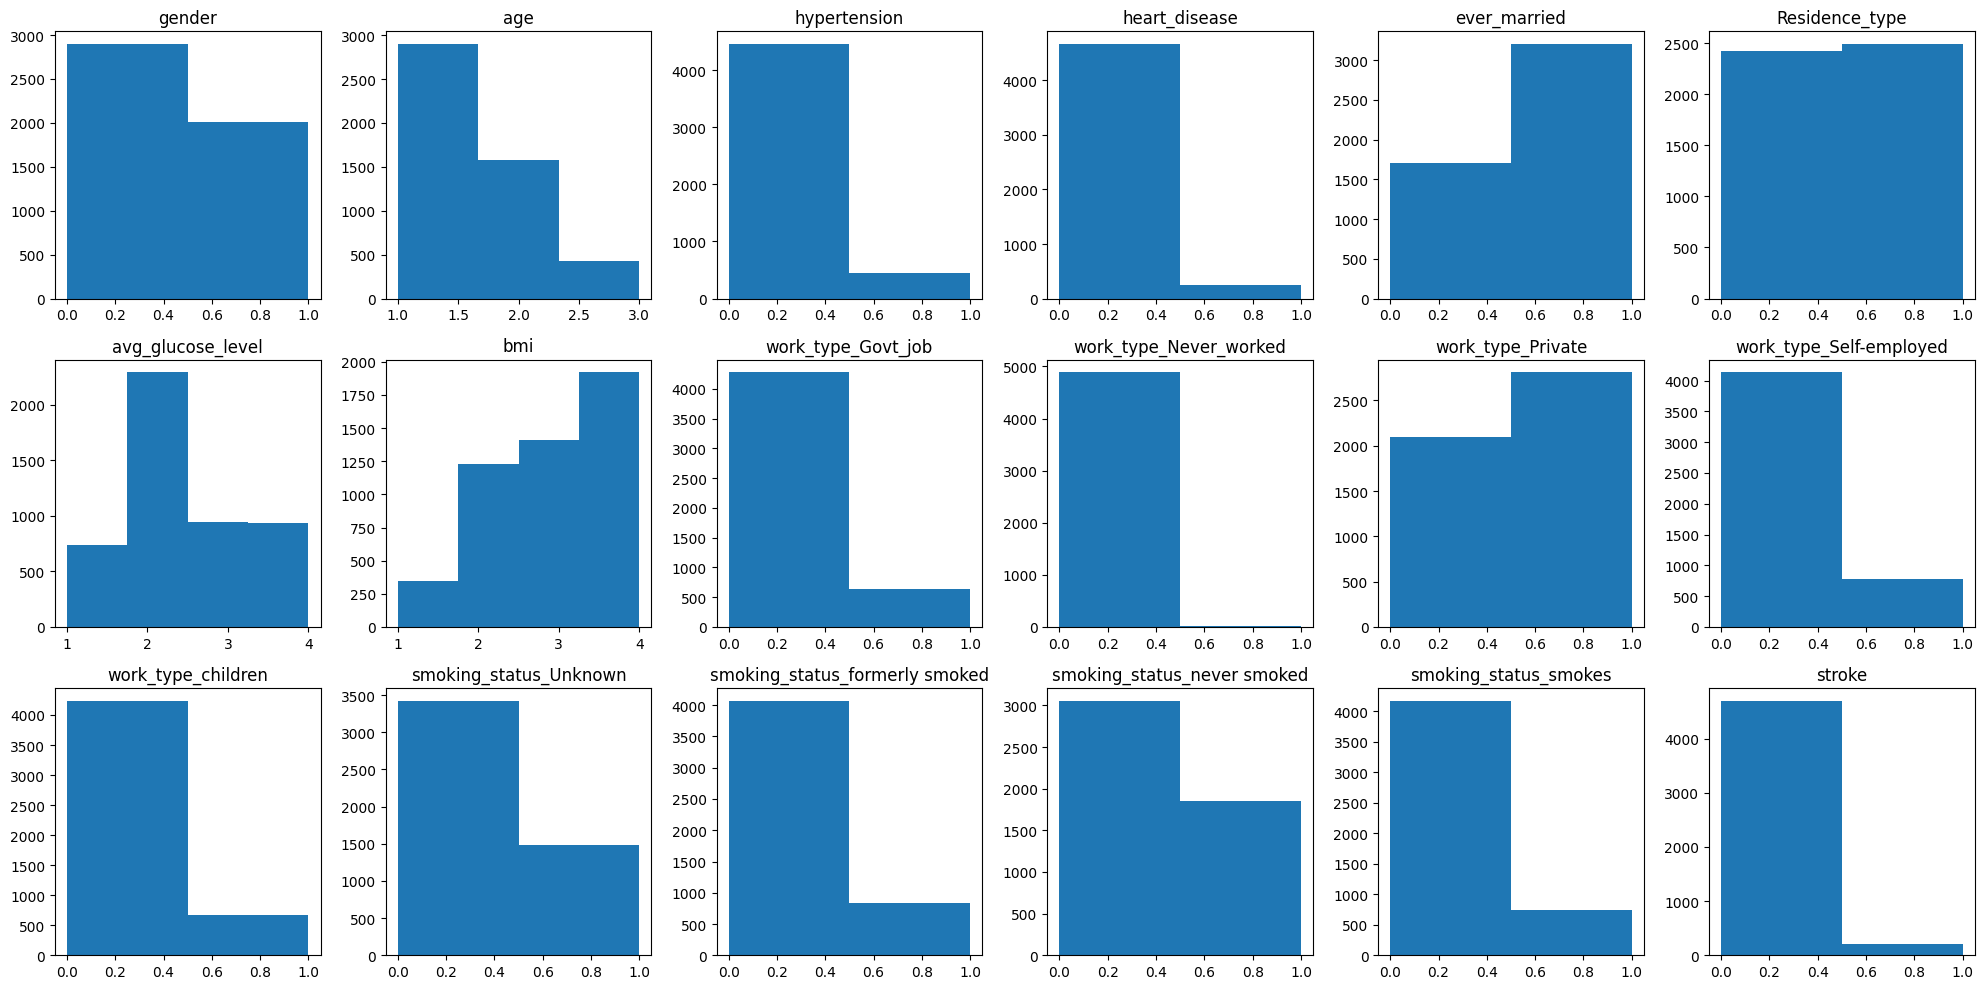

In [24]:
# plot_hist(original_df, 2, 6, figsize = (20,6))
plot_hist(X, 3, 6, figsize = (20,10))

In [25]:
X['work_type_Never_worked'].value_counts()

0    4886
1      22
Name: work_type_Never_worked, dtype: int64

In [26]:
def corr_up_thershold(df,threshold):
    cond = (abs(df) > threshold) & (df != 1)  # Boolean condition to find values outside range
    result = df.where(cond)  # Return the corresponding values as a dataframe
    result = result.stack()  # Stack the dataframe to return column names as rows
    result = result.reset_index()  # Reset the index to separate column names
    result.columns = ['Index', 'Column', 'Value']  # Rename columns
    result = result[['Column', 'Value']]  # Select only 'Column' and 'Value' columns
    return result

In [27]:
def corr_plot(df,method = 'pearson',annot = True, thershold = 0,figsize=(10, 10)):
    # corr_matrix_original = X.corr(method='spearman')  # method = spearman
    corr_matrix_original = df.corr(method=method)  # method = pearson
    # # Set figure size
    plt.figure(figsize=figsize)


    # # Create heatmap
    sns.heatmap(corr_matrix_original[abs(corr_matrix_original)>=thershold], cmap="coolwarm", annot=annot, fmt="0.2f")

    # # Show plot
    plt.show()

    return corr_matrix_original

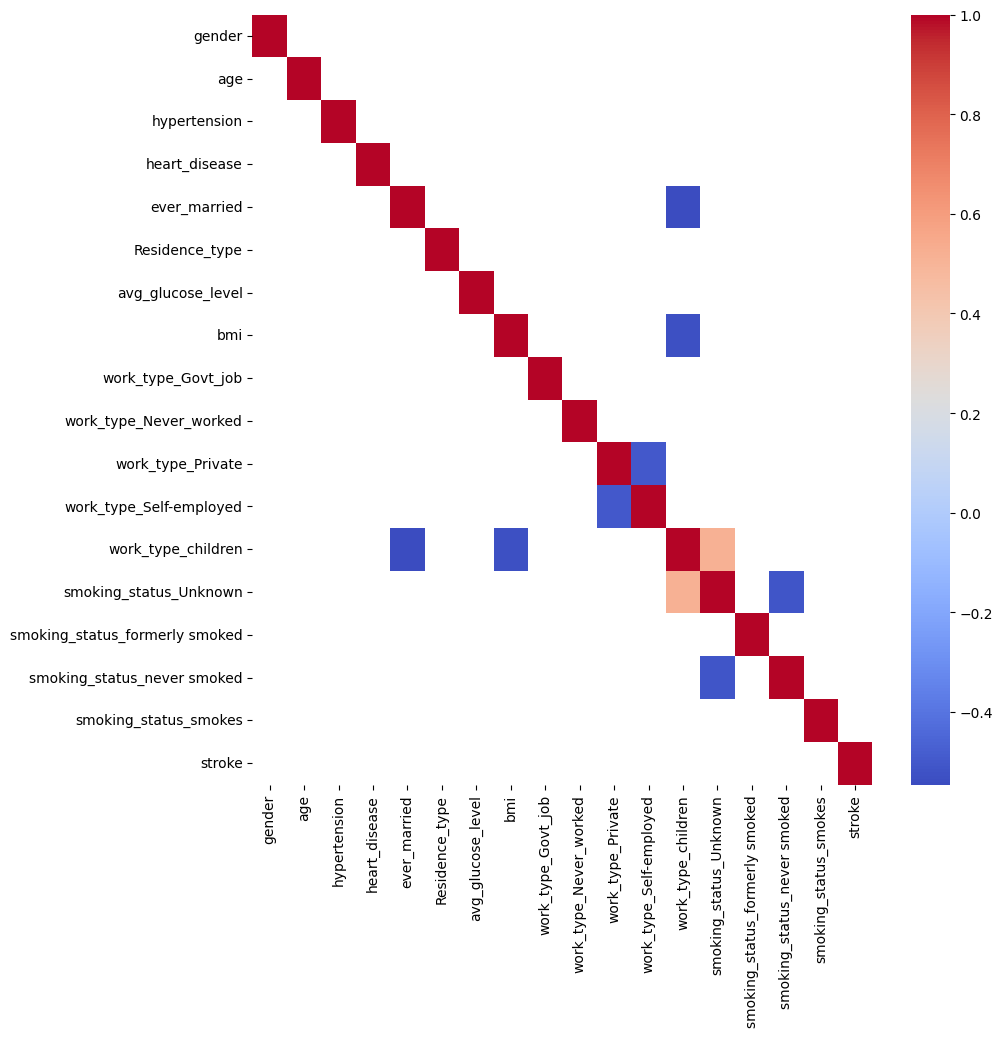

In [28]:
corr_matrix_o = corr_plot(X,method = 'pearson',annot = False, thershold = 0.5,figsize=(10, 10))

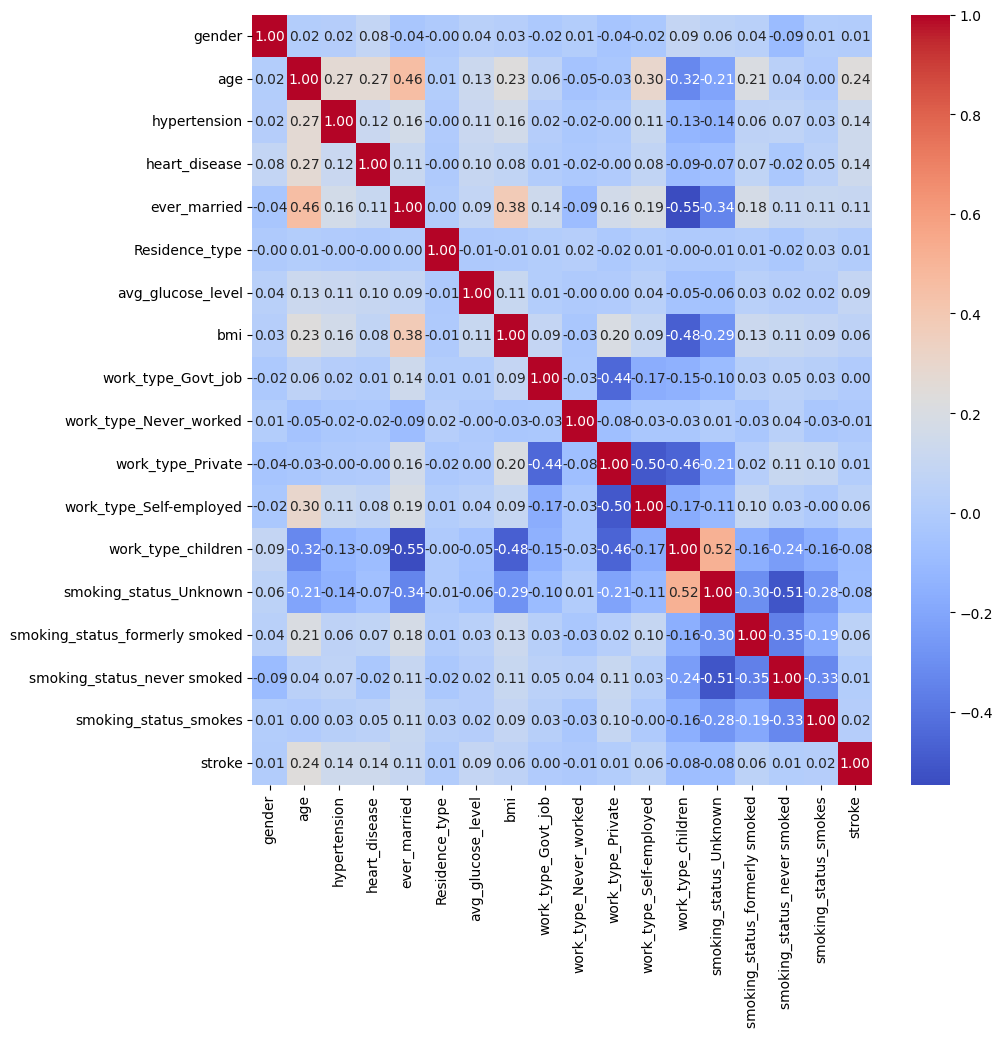

In [29]:
# corr_matrix = corr_plot(original_df,'spearman')
corr_matrix = corr_plot(X,'spearman')

In [30]:
corr_up_thershold(corr_matrix,0.4)

,Column,Value
0,ever_married,0.456581
1,age,0.456581
2,work_type_children,-0.545687
3,work_type_children,-0.476015
4,work_type_Private,-0.444120
5,work_type_Govt_job,-0.444120
6,work_type_Self-employed,-0.501151
7,work_type_children,-0.460556
8,work_type_Private,-0.501151
9,ever_married,-0.545687


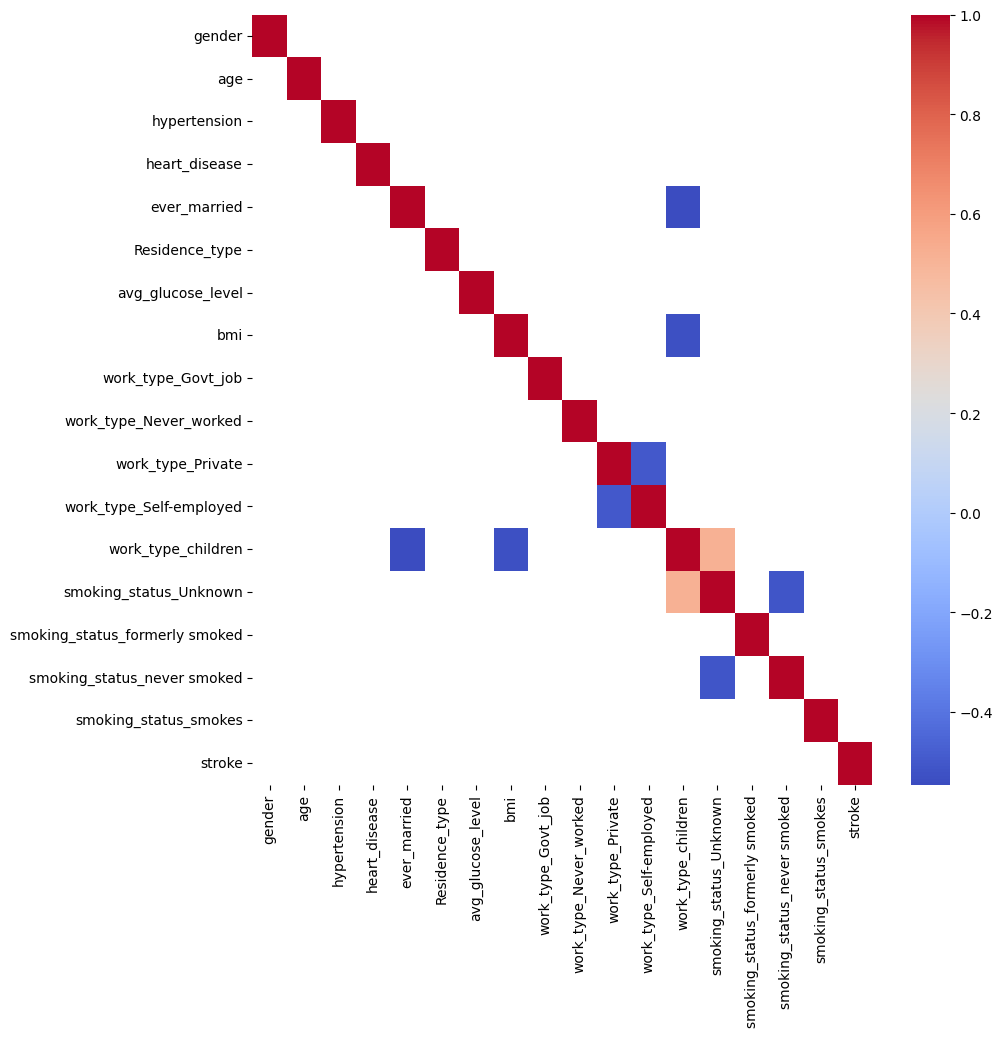

In [31]:
corr_matrix = corr_plot(X,annot = False,thershold=0.5)

Strong correlation ( ||correlation coeff|| > 0.5):

    work_type_children - ever_married //

    work_type_children - bmi //

    worK_type_selfemployed - work_type_private //

    smoking_status_unknown - work_type_children //

    smoking_status_never_smoked - smoking_status_unknown //

In summary,

    children -- bmi, ever_married, smoking unknown
    private -- selfemployed
    never smoked -- smoking unknown


Therefore 7 vars can be taken as 1 var (?)

<div style = 'border: 2px solid #D9C10B;'>

### Private is more balanced in all of above vars

In [32]:
# df = original_df.copy()
df = X.copy()
df.drop(['work_type_children','bmi','ever_married','smoking_status_Unknown','smoking_status_never smoked','work_type_Self-employed'], axis=1, inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   gender                          4908 non-null   int64
 1   age                             4908 non-null   int64
 2   hypertension                    4908 non-null   int64
 3   heart_disease                   4908 non-null   int64
 4   Residence_type                  4908 non-null   int64
 5   avg_glucose_level               4908 non-null   int64
 6   work_type_Govt_job              4908 non-null   int64
 7   work_type_Never_worked          4908 non-null   int64
 8   work_type_Private               4908 non-null   int64
 9   smoking_status_formerly smoked  4908 non-null   int64
 10  smoking_status_smokes           4908 non-null   int64
 11  stroke                          4908 non-null   int64
dtypes: int64(12)
memory usage: 460.2 KB


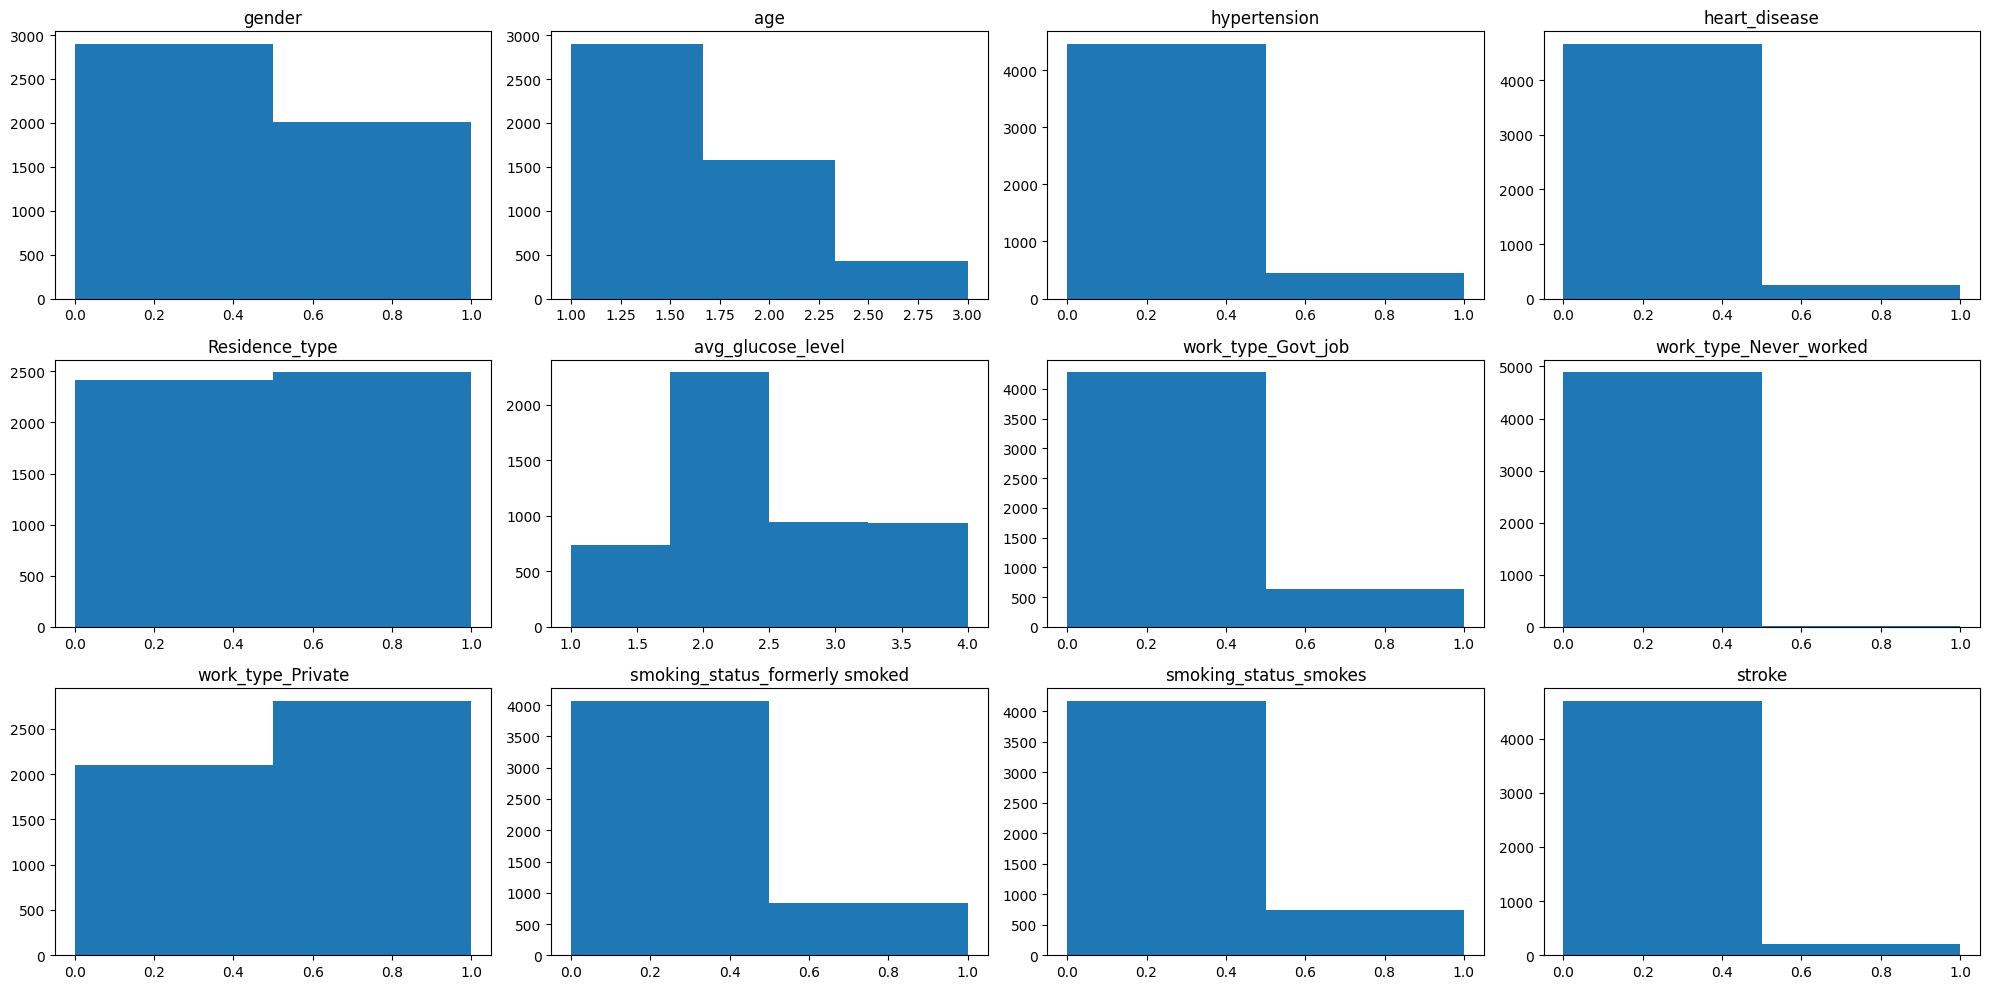

In [34]:
plot_hist(df, 3, 4, figsize = (20,10))

# Class Imbalance

In [42]:
df['stroke'].value_counts()

0    4699
1     209
Name: stroke, dtype: int64

In [35]:
class_weights = compute_class_weight(classes = df['stroke'].unique(), y = df['stroke'], class_weight='balanced')
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

{0: 11.741626794258373, 1: 0.5222387742072782}

Without Data augmentation, the class werghts were in 20.52 : 1 ratio which was very high, therefore model wasn't able to properly train. Thus it was overfitting for many architecture change or parameters change (tried and tested) 

# Defining the Model Architecture and appropriate loss function and metrices and Training the model

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [44]:
# df = df.drop('id', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df.drop('stroke',axis=1), df['stroke'], test_size=0.3, random_state=42)

In [45]:
X_train = X_train.sort_index().reset_index(drop=True)
X_test = X_test.sort_index().reset_index(drop=True)
y_train = y_train.sort_index().reset_index(drop=True)
y_test = y_test.sort_index().reset_index(drop=True)

In [46]:
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE

In [71]:
tf.random.set_seed(42)

def create_model(train_resample_x):
    model = Sequential()
    model.add(Conv1D(filters=20, kernel_size=2, activation='relu', input_shape=(11,1),bias_initializer=glorot_uniform(seed=42),kernel_initializer=glorot_uniform(seed=42)))
    model.add(Conv1D(filters=20, kernel_size=2, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

smote = SMOTE(random_state=42)
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=42)

x = df.drop('stroke',axis=1).copy()
y = df['stroke'].copy()
for i, (train_index, test_index) in enumerate(cv.split(df.drop('stroke',axis=1), df['stroke'])):
    train_resample_x,train_resample_y = smote.fit_resample(x.iloc[train_index],y.iloc[train_index])
    if (i==0) : 
        model = create_model(train_resample_x)
    history = model.fit(train_resample_x, train_resample_y, validation_data=[x.iloc[test_index], y.iloc[test_index]], batch_size = 5, epochs=50, verbose=0)
    # evaluate the model
    print(f"\nFold {i}:")
    loss = np.array([history.history['loss']])
    acc = np.array([history.history['accuracy']])
    val_loss = np.array([history.history['val_loss']])
    val_acc = np.array([history.history['val_accuracy']])
    if(i==0):
        loss_arr = loss
        acc_arr = acc
        val_loss_arr = val_loss
        val_acc_arr = val_acc
    if(i!=0):
        loss_arr = np.concatenate((loss,loss_arr))
        acc_arr = np.concatenate((acc,acc_arr))
        val_loss_arr = np.concatenate((loss,val_loss_arr))
        val_acc_arr = np.concatenate((acc,val_acc_arr))
    print(f'Loss:  {mean(loss)}')
    print(f'Accuracy:  {mean(acc)}')
    print(f'Val_Loss:  {mean(val_loss)}')
    print(f'Val_Accuracy:  {mean(val_acc)}')
    results = model.evaluate(X_test, y_test, verbose=0)
    print(f'Evaluation Results: {results}')
    print(f'Model Metric: {model.metrics_names}')

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_30 (Conv1D)          (None, 10, 20)            60        
                                                                 
 conv1d_31 (Conv1D)          (None, 9, 20)             820       
                                                                 
 dropout_15 (Dropout)        (None, 9, 20)             0         
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 4, 20)            0         
 g1D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 80)                0         
                                                                 
 dense_45 (Dense)            (None, 10)                810       
                                                     

# Results

In [72]:
# Final results
print(f'Evaluation Results: {results}')
print(f'Model Metric: {model.metrics_names}')

Evaluation Results: [0.4593868553638458, 0.7603530287742615]
Model Metric: ['loss', 'accuracy']


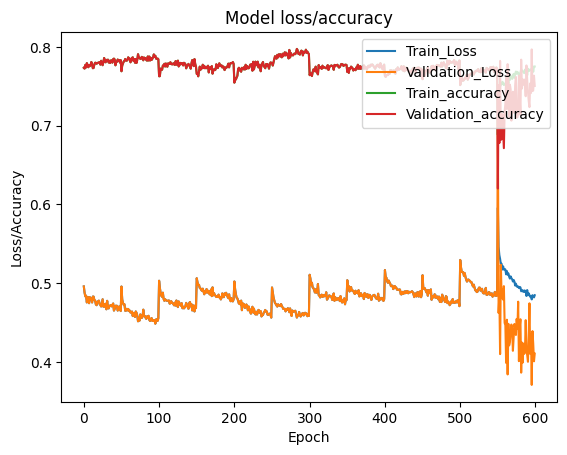

In [83]:
# Plot training & validation loss values
plt.plot(loss_arr.flatten())
plt.plot(val_loss_arr.flatten())
plt.plot(acc_arr.flatten())
plt.plot(val_acc_arr.flatten())
plt.title('Model loss/accuracy')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Loss', 'Validation_Loss','Train_accuracy', 'Validation_accuracy'], loc='upper right')
plt.show()

# Confusion matrix on testing data

In [84]:
from sklearn.metrics import confusion_matrix

47/47 [==============================] - 0s 2ms/step


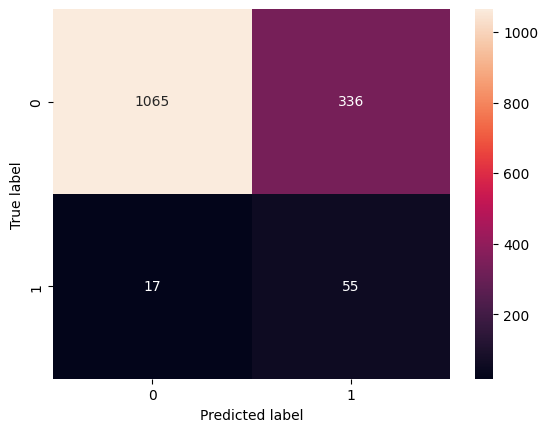

In [85]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.5) #threshold - 0.5
cm = confusion_matrix(y_test, y_pred_binary)
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Model Metrics 

In [86]:
from sklearn import metrics
print(metrics.classification_report(y_true= y_test,y_pred=y_pred_binary,target_names=['No Stroke','Stroke']))

              precision    recall  f1-score   support

   No Stroke       0.98      0.76      0.86      1401
      Stroke       0.14      0.76      0.24        72

    accuracy                           0.76      1473
   macro avg       0.56      0.76      0.55      1473
weighted avg       0.94      0.76      0.83      1473

